
# Pyber : Ride With Us
#Chief Data Strategist Analysis Report on Pyber Rideshare:
We compared rideshare usage for cities classified as rural, suburban, and urban. The largest percentile of fares, drivers, and rides were used in urban ares, trailed by suburban and rural areas.
About 63% of fares were from urban city types, compared to 31% suburban, and 7% rural.
About 69% of rides were located in urban city types, compared to 26% suburban, and 5% rural. 
In addition, the majority of the drivers were located in urban city areas.
The significant difference between the urban city rideshare use and suburban or rural can possibly be correlated to a higher demand from the larger population and higher demand due to lack of personal vehicles. 



In [1]:
%matplotlib inline
#Import dependencies and setup data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

#File to Load
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

#Read the City and Ride Data 
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

#drop duplicates
city_data = city_data.drop_duplicates('city')

#Combine the data into a single dataset
cityride_data = pd.merge(ride_data, city_data, how="left", on=["city","city"])

#Display the data table for preview
cityride_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

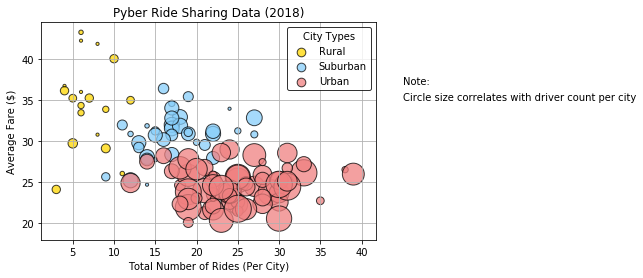

<Figure size 432x288 with 0 Axes>

In [2]:
#Obtain the x and y coordinates for each of the three city types: urban, suburban, and rural
city_grp = cityride_data.groupby('city')
avg_fare = city_grp['fare'].mean()
rides = city_grp['ride_id'].count()
drivers = city_grp['driver_count'].mean()
city_type = city_data.set_index('city')['type']

#Dataframe setup
city_df = pd.DataFrame({
        "Number of Rides":rides,
        "Average Fare":avg_fare,
        "Number of Drivers":drivers,
        "Type of City":city_type
})
city_df.sort_values('Number of Drivers',ascending=False)

# Build the scatter plots for each of the city types
ruraltype = city_df[city_df['Type of City'] == 'Rural']
suburbantype = city_df[city_df['Type of City'] == 'Suburban']
urbantype = city_df[city_df['Type of City'] == 'Urban']

# Tells matplotlib that we want to make a scatter plot
#Aesthetics: colors are available in Py3 matplotlib, including light coral. Let's blow pretty bubbles:
bubble_colors={'gold':'#FFD700','light sky blue':'#87CEFA','light coral':'#F08080'}
citybubbles={'Rural':bubble_colors['gold'],'Suburban':bubble_colors['light sky blue'],'Urban':bubble_colors['light coral']}

#The size of each point on our plot is determined by their x value, number of drivers
# Follows general scatter plot format of plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black", s=x_axis, alpha=0.75)
plt.scatter(ruraltype['Number of Rides'],ruraltype['Average Fare'], s = ruraltype['Number of Drivers']*10, 
            color=citybubbles['Rural'],edgecolor='black',label='Rural', alpha = 0.75)
plt.scatter(suburbantype['Number of Rides'],suburbantype['Average Fare'], s = suburbantype['Number of Drivers']*10, 
            color=citybubbles['Suburban'],edgecolor='black',label='Suburban', alpha = 0.75)
plt.scatter(urbantype['Number of Rides'],urbantype['Average Fare'], s = urbantype['Number of Drivers']*10, 
            color=citybubbles['Urban'],edgecolor='black',label='Urban', alpha = 0.75)

#Incorporated the other graph properties. I assumed the year.
plt.title('Pyber Ride Sharing Data (2018)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid(True)

# Create a legend
lgnd=plt.legend(frameon=True,edgecolor='black', title="City Types")
lgnd.legendHandles[0]._sizes =[75]
lgnd.legendHandles[1]._sizes =[75]
lgnd.legendHandles[2]._sizes =[75]
#ax.legend([['ruraltype','suburbantype','urbantype')],[]
#plt.gca().legend(loc="upper right")

# Incorporate a text label regarding circle size. Can use plt.txt for x y pos of such descriptive texts.
plt.text(45,37,'Note:',fontsize=10)
plt.text(45,35,'Circle size correlates with driver count per city',fontsize=10)

# Show plot. Limits were not used for this plot.
plt.show()

# Save Figure, with defined path or it goes in hiding.
plt.savefig("../Images/Pyber_plot.png")


## Total Fares by City Type

c:\users\la_le\anaconda3\envs\data_env2\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


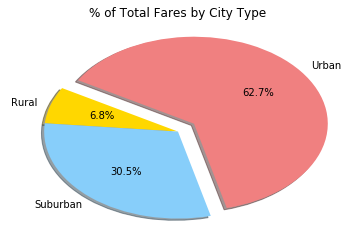

In [4]:
# Calculate Type Percents
#Overall grouping by city type for the three pie charts
#groupby typecity_grp = cityride_data.groupby('city')
bycitytype = cityride_data.groupby('type')['type','fare','ride_id', 'driver_count']

#Total Sum of fares by city type
faretot=bycitytype.sum()['fare']

#Build Pie Chart
labels=faretot.index
colors=["gold","lightskyblue","lightcoral"]
explode = (0,0,0.15)
plt.pie(faretot,explode=explode,labels=labels,colors=colors,autopct="%1.1f%%",shadow=True, startangle=150)
plt.axes().set_aspect(0.65)
plt.title("% of Total Fares by City Type", Fontsize=12)

# Save Figure
plt.savefig("../Images/Fares_by_City_Type.png")
# Show Figure
plt.show()

In [61]:
faretot

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

## Total Rides by City Type

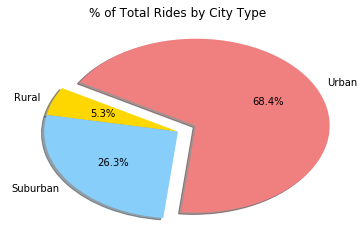

In [6]:
#Calculate Ride Percents by city type
ridetot=bycitytype.count()['ride_id']

#Build Pie Chart
labels=ridetot.index
colors=["gold","lightskyblue","lightcoral"]
explode = (0,0,0.15)
plt.pie(ridetot,explode=explode,labels=labels,colors=colors,autopct="%1.1f%%",shadow=True, startangle=150)
plt.axes().set_aspect(0.65)
plt.title("% of Total Rides by City Type", Fontsize=12)

# Save Figure
plt.savefig("../Images/Total_Rides_by_City_Type.png")
# Show Figure
plt.show()

In [56]:
ridetot

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

## Total Drivers by City Type

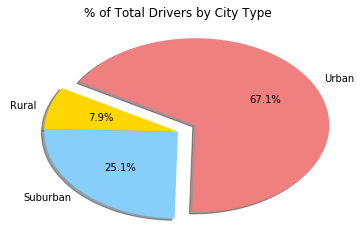

In [13]:
# Calculate Driver Percents
bycitytype = cityride_data.groupby(['type'])
drivertot=bycitytype.mean()['driver_count']
#drivertot=bycitytype['driver_count'].count()

#Build Pie Chart
labels=drivertot.index
colors=["gold","lightskyblue","lightcoral"]
explode = (0,0,0.15)
plt.pie(drivertot,explode=explode,labels=labels,colors=colors,autopct="%1.1f%%",shadow=True, startangle=150)
plt.axes().set_aspect(0.65)
plt.title("% of Total Drivers by City Type", Fontsize=12)

# Save Figure
plt.savefig("../Images/Total_Drivers_by_City_Type.png")

# Show Figure
plt.show()

In [14]:
drivertot

type
Rural        4.296000
Suburban    13.712000
Urban       36.678154
Name: driver_count, dtype: float64

In [15]:
bycitytype.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban
1625,Barronchester,2018-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2018-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2018-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2018-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2018-04-19 01:06:59,37.78,2273047151891,12,Suburban
